# Logistic Regression in Python
## Scikit-learn : Example

In [1]:
# Step 1 : Import Package, Function, and Classes
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression # untuk membuat model LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix # untuk Get Result

In [2]:
# Step 2 : Get Data
# Provide input/predictor (x) and output/response (y)
x = np.arange(10).reshape(-1,1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

print (x)
print (y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]


In [3]:
# Step 3 : Create and Train Model
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [4]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [5]:
model.classes_

array([0, 1])

In [6]:
print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


In [8]:
# Step 4 : Evaluate the Model
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [9]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

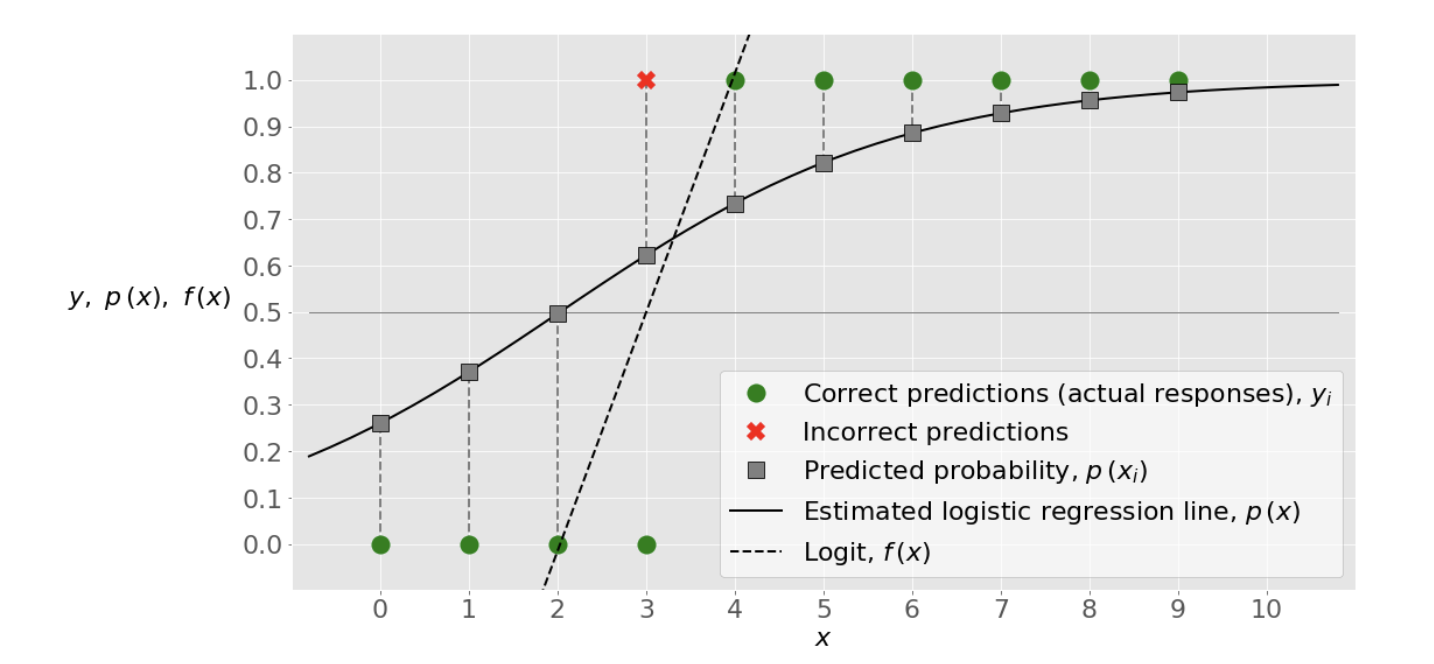

In [10]:
model.score(x, y)

0.9

In [11]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

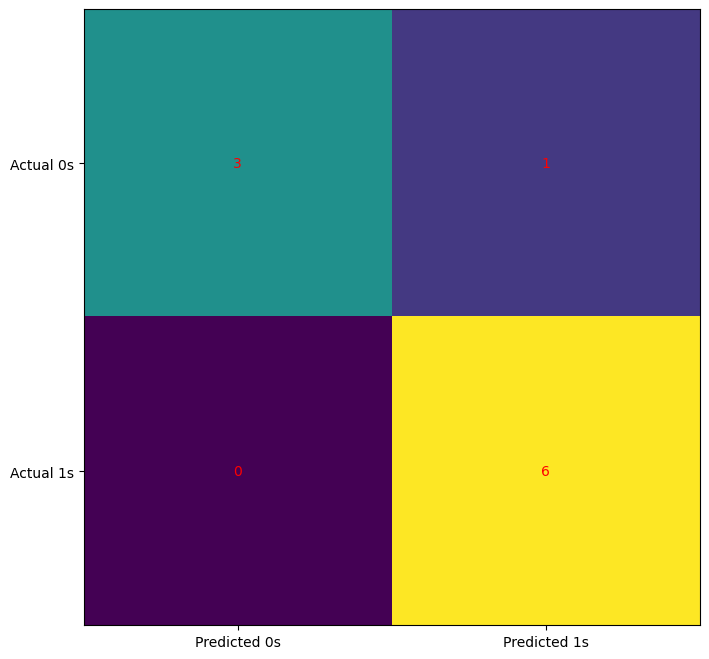

In [12]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

        
plt.show()

In [13]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [14]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(x,y)

In [15]:
print(model.intercept_, model.coef_)

[-3.51335372] [[1.12066084]]


In [16]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [17]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [18]:
model.score(x, y)

1.0

In [19]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [20]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Handwriting Recognition

In [21]:
# Step 1 : Import Package
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits # Provide Data
from sklearn.linear_model import LogisticRegression # for Model
from sklearn.metrics import classification_report, confusion_matrix # for Get Result
from sklearn.model_selection import train_test_split # for splitting data
from sklearn.preprocessing import StandardScaler # for Scaling data

In [22]:
# Step 2 : Provide Data
x, y = load_digits(return_X_y=True)
x.shape

(1797, 64)

In [23]:
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

In [25]:
scaler = StandardScaler()

In [26]:
x_train = scaler.fit_transform(x_train)

In [27]:
# Step 3 : Create and Train Model
model = LogisticRegression(
    solver='liblinear',
    C=.05,
    multi_class='ovr',
    random_state=0
).fit(x_train, y_train)

In [28]:
# Step 4 : Evaluate Model
x_test = scaler.fit_transform(x_test)

In [29]:
y_pred = model.predict(x_test)

In [30]:
print("Train Set Accuracy :",model.score(x_train, y_train))
print("Test Set Accuracy :",model.score(x_test, y_test))

Train Set Accuracy : 0.964509394572025
Test Set Accuracy : 0.95


In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 2,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]], dtype=int64)

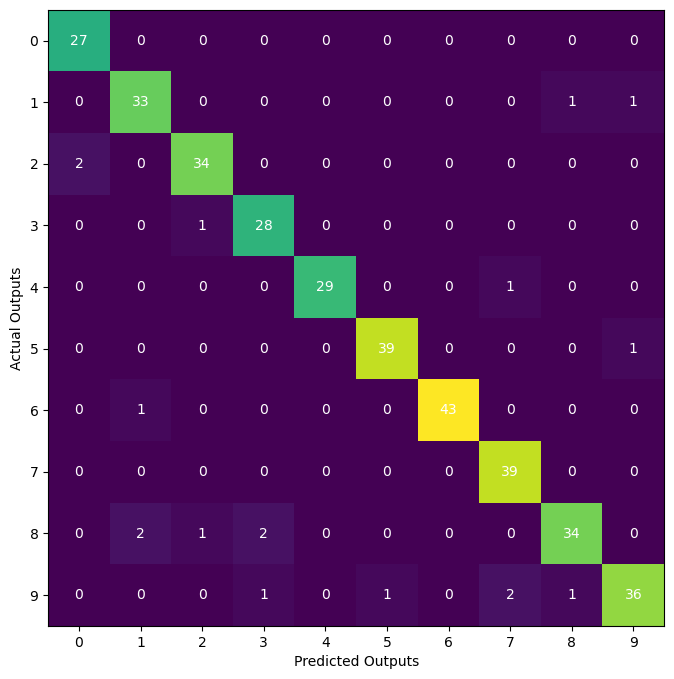

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted Outputs', color='k')
ax.set_ylabel('Actual Outputs', color='k')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -.5)

for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')

        
plt.show()

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       0.92      0.94      0.93        35
           2       0.94      0.94      0.94        36
           3       0.90      0.97      0.93        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       0.93      1.00      0.96        39
           8       0.94      0.87      0.91        39
           9       0.95      0.88      0.91        41

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



# K-Nearest Neighbor (KNN)
## Scikit-Learn : Example 1

In [35]:
# Defining Dataset
# First Feature
weather = [
    'Sunny', 'Sunny',
    'Overcast', 'Rainy',
    'Rainy', 'Rainy',
    'Overcast', 'Sunny',
    'Sunny', 'Rainy',
    'Sunny', 'Overcast',
    'Overcast', 'Rainy'
]

# Second Feature
temp = [
    'Hot', 'Hot',
    'Hot', 'Mild',
    'Cool', 'Cool',
    'Cool', 'Mild',
    'Cool', 'Mild',
    'Mild', 'Mild',
    'Hot', 'Mild'
]

# Label or Target Variable
play = [
    'No', 'No',
    'Yes', 'Yes',
    'Yes', 'No',
    'Yes', 'No',
    'Yes', 'Yes',
    'Yes', 'Yes',
    'Yes', 'No'
]

Encoding 

In [36]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder() # bikin instance labelencoder

In [38]:
# Converting string into numbers
weather_encoded = le.fit_transform(weather)
print(weather_encoded)

# mendapatkan mapping hasil encode
weather_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(weather_mapping)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
{'Overcast': 0, 'Rainy': 1, 'Sunny': 2}


In [39]:
# Converting string into numbers
temp_encoded = le.fit_transform(temp)
print(temp_encoded)

# mendapatkan mapping hasil encode
temp_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(temp_mapping)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
{'Cool': 0, 'Hot': 1, 'Mild': 2}


In [40]:
# Converting string labels into numbers
label = le.fit_transform(play)
print(label)

# mendapatkan mapping hasil encode
play_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(play_mapping)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]
{'No': 0, 'Yes': 1}


Combining Features

In [41]:
features = list(zip(weather_encoded, temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [42]:
# Generating : Create and Train Model
# Import package
from sklearn.neighbors import KNeighborsClassifier

# Create Model
model = KNeighborsClassifier(n_neighbors = 3)

# Train model
model.fit(features, label)

KNeighborsClassifier(n_neighbors=3)

In [43]:
# Predict Output
# 0: Overcast, 2: Mild
predicted = model.predict([[0,2]])

print(predicted)

[1]


## KNN with Multiple Labels

In [44]:
# Load Data
from sklearn import datasets

# Load dataset
wine = datasets.load_wine()

In [45]:
# print the names of features
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [46]:
# print the labels
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [47]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [48]:
# check the target data
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [49]:
print(wine.data.shape)

(178, 13)


In [50]:
print(wine.target.shape)

(178,)


In [51]:
# Split Data

from sklearn.model_selection import train_test_split

# split into train set dan test set
# Train 70%, Test 30%
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=.3, random_state=5)

In [52]:
# Generating Model with k=5
# Import Package
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier, with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)

# Train model using Train Sets
knn_5.fit(X_train, y_train)

# Predict Output
y_pred = knn_5.predict(X_test)

print(y_pred)

[0 1 0 0 1 1 0 2 0 0 0 0 2 2 2 0 1 1 2 2 0 0 0 1 1 1 0 1 2 0 1 2 0 0 2 0 0
 2 2 2 1 1 2 0 1 1 0 1 0 1 0 1 2 0]


In [53]:
# Evaluate model(k=5)
# import library for accuracy calculation
from sklearn import metrics

# model accuracy, how often is the classifier correct
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.7037037037037037


In [54]:
# Regenerating model (k=7)
# Import Package
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier, with k=5
knn_7 = KNeighborsClassifier(n_neighbors=7)

# Train model using Train Sets
knn_7.fit(X_train, y_train)

# Predict Output
y_pred = knn_7.predict(X_test)

print(y_pred)

[0 1 0 0 2 1 0 2 0 0 2 0 2 1 2 0 1 2 2 2 0 0 0 1 1 1 0 2 2 0 1 2 0 0 2 0 0
 2 2 2 1 1 2 0 1 1 0 2 0 1 0 1 2 0]


In [55]:
# import library for accuracy calculation
from sklearn import metrics

# model accuracy, how often is the classifier correct
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.7592592592592593


In [56]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_pred))

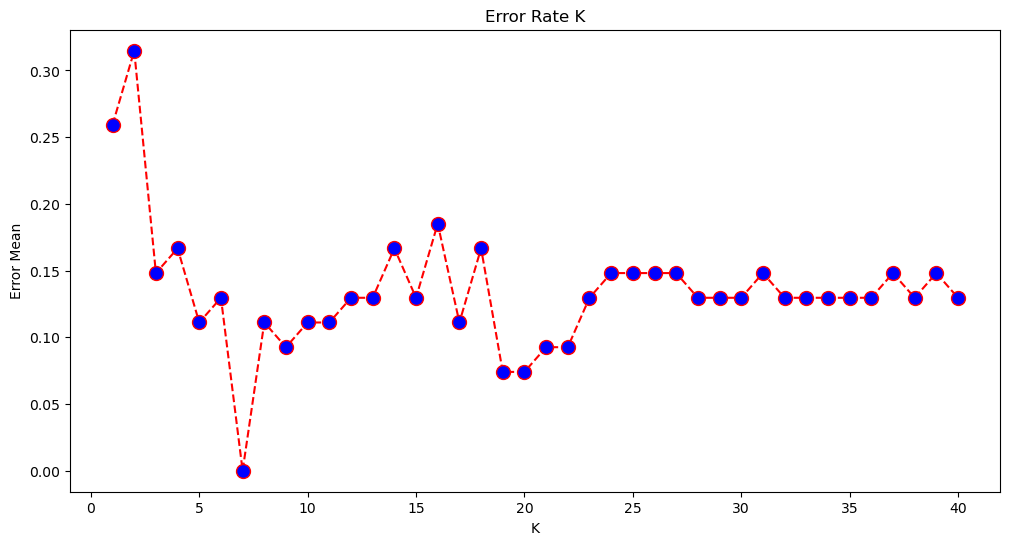

In [57]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 41),
         error,
         color='red',
         linestyle='dashed',
         marker='o',
         markerfacecolor='blue',
         markersize=10
        )

plt.title("Error Rate K")
plt.xlabel('K')
plt.ylabel('Error Mean')
plt.show()

In [58]:
# Import Package
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier, with k=5
knn_7 = KNeighborsClassifier(n_neighbors=7)

# Train model using Train Sets
knn_7.fit(X_train, y_train)

# Predict Output
y_pred = knn_7.predict(X_test)

print(y_pred)

[0 1 0 0 2 1 0 2 0 0 2 0 2 1 2 0 1 2 2 2 0 0 0 1 1 1 0 2 2 0 1 2 0 0 2 0 0
 2 2 2 1 1 2 0 1 1 0 2 0 1 0 1 2 0]


In [59]:
from sklearn import metrics
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.7592592592592593
